# Mão na massa

Esse notebook contém diversas atividades envolvendo os aprendizados de cada aula. É um notebook construído com o enunciado de cada atividade e com espaço para construir e executar suas soluções. Se for necessário adicionar mais células de código para resolver a atividade, fique à vontade para acrescentar.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Aula 1

### Atividade 1

A primeira tarefa em um projeto é o carregamento dos dados. Faça a leitura da base de dados utilizando a biblioteca `Pandas` e faça a transformação da coluna de data para o formato `datetime`, transferindo os dados para o índice do DataFrame.

In [6]:
data = pd.read_csv("Base de dados - Mão na massa.csv")
data["data"] = pd.to_datetime(data["data"])
data.set_index("data", inplace=True)
data

,Sal Sinha,O Régano
data,,
2016-01-01,25.0,67.0
2016-01-02,39.0,43.0
2016-01-03,31.0,66.0
2016-01-04,18.0,NaN
2016-01-05,15.0,38.0
...,...,...
2017-04-18,30.0,NaN
2017-04-19,11.0,30.0
2017-04-20,3.0,19.0


### Atividade 2

Depois de carregar os dados, chegou o momento de checar a consistência dos dados. Verifique a presença de dados nulos e faça os tratamentos necessários.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sal Sinha  476 non-null    float64
 1   O Régano   476 non-null    float64
dtypes: float64(2)
memory usage: 11.2 KB


In [9]:
def show_missing(col):
    missing_numbers = data[col][data[col].isna()].index    
    data[col].plot(figsize=(20, 6))
    
    for i in missing_numbers:
        plt.axvline(x=i, c="red")
    plt.show()

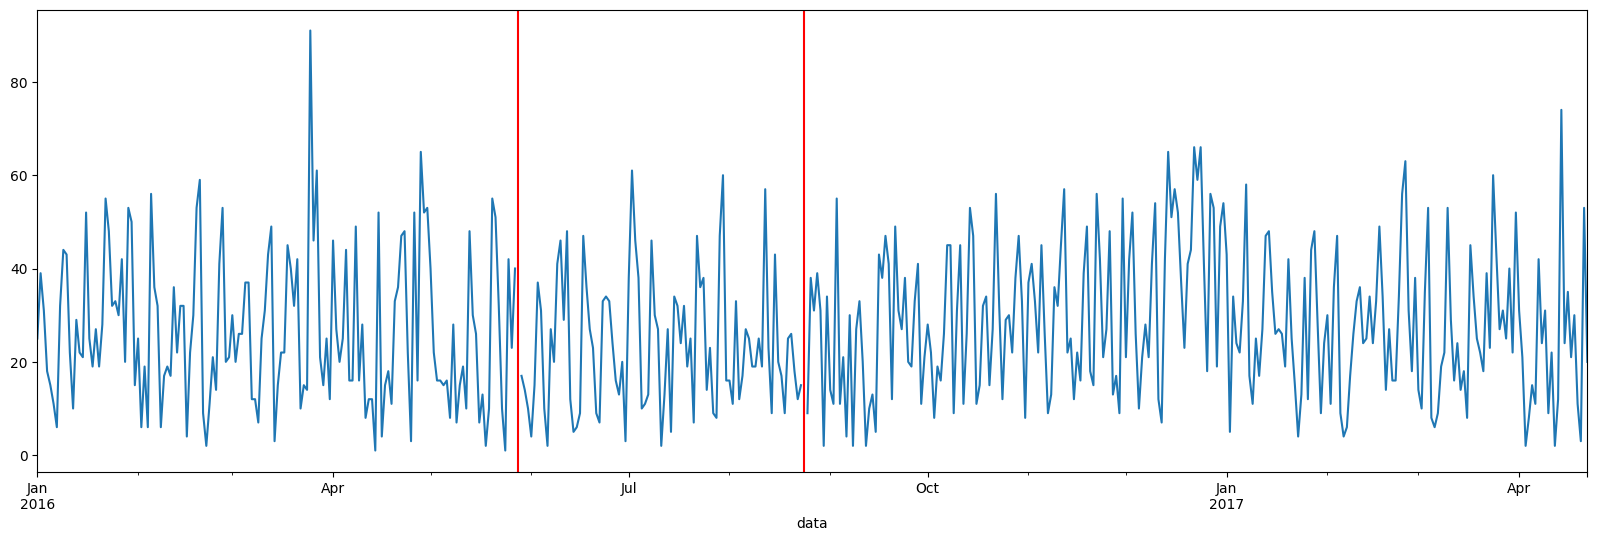

In [12]:
show_missing("Sal Sinha")

In [13]:
data = data.interpolate()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 478 entries, 2016-01-01 to 2017-04-22
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sal Sinha  478 non-null    float64
 1   O Régano   478 non-null    float64
dtypes: float64(2)
memory usage: 11.2 KB


### Atividade 3

Com a base de dados totalmente tratada, chegou o momento de começar as análises. Utilize gráficos de distribuição e boxplot para responder às seguintes perguntas:
- Qual é a quantidade mais frequente de clientes nos restaurantes?
- Qual a quantidade mínima e máxima de clientes que frequentaram os restaurantes?
- Existem dados discrepantes, com um padrão muito distante da maior parte dos dados?


<Axes: ylabel='Count'>

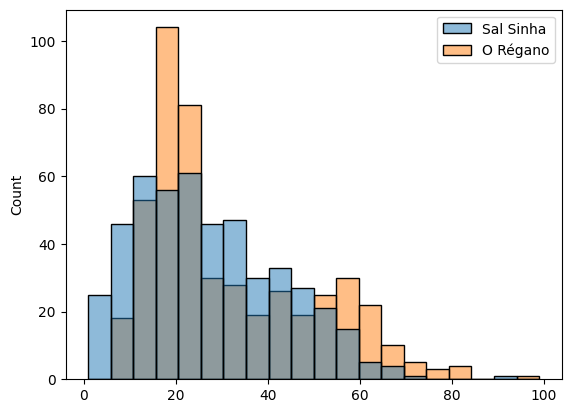

In [15]:
sns.histplot(data)

<Axes: >

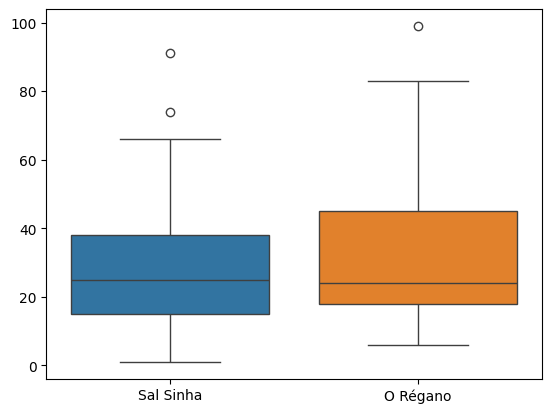

In [16]:
sns.boxplot(data)

## Aula 2

### Atividade 1

Para compreender melhor o comportamento da quantidade de clientes da rede de restaurantes, é preciso calcular o total de clientes dos dois restaurantes. Nesta tarefa, realize a soma das séries temporais dos dois restaurantes e responda às seguintes perguntas:
- Qual é a quantidade de clientes mais frequente e menos frequente da rede de restaurantes?
- Qual é a quantidade mínima e máxima de clientes que frequentaram a rede de restaurantes?


### Atividade 2

Para verificar como anda o negócio ao longo do ano, é preciso agregar os dados em um período de tempo maior. Nesta atividade, agrupe os dados com base no mês e construa um gráfico de barras empilhado que mostre a quantidade de clientes total para cada mês.

### Atividade 3

Para entender melhor o comportamento de crescimento e decrescimento dos clientes ao longo do tempo, é necessário fazer uma suavização da série temporal. Utilize a média móvel simples de 7 dias para entender o comportamento de tendência das séries temporais dos dois restaurantes, criando um gráfico de comparação entre a série temporal original e a média móvel.


## Aula 3

### Atividade 1

Para encontrar em quais datas ocorreram valores discrepantes, precisamos encontrar o nome do dia da semana e entender se ocorreram em datas comemorativas. Crie uma nova coluna na base de dados contendo o nome do dia da semana e agrupe os dados com as datas comemorativas.

Obs: Para resolver esse desafio, é necessário utilizar a base de dados contendo as datas comemorativas.


### Atividade 2

Para detectar pontos de anomalia nos dados, é necessário encontrar valores muito distantes da média usando o método `zscore`. Importe o método `zscore` da biblioteca `scipy`, crie uma função para detectar valores discrepantes com método zscore e detecte os pontos de anomalia nos dados.

### Atividade 3

Para visualizar os pontos de anomalia de dados, podemos nos recorrer a gráficos e tabelas. Construa um gráfico de linhas da série temporal de quantidade de clientes com pontos de destaque para as anomalias e apresente uma tabela completa com os dados discrepantes contendo data e nome do dia da semana da anomalia.

## Aula 4

### Atividade 1

Para identificar padrões sazonais na série temporal, podemos utilizar gráficos de autocorrelação, que medem a relação da série temporal com ela mesma, defasada em um determinado período de tempo. Crie gráficos de autocorrelação e autocorrelação parcial para cada um dos restaurantes, indicando se há algum padrão de sazonalidade existente nos dados.

### Atividade 2

No intuito de compreender melhor o padrão dos dados, podemos fazer a decomposição de uma série temporal para checar tendências de crescimento/decrescimento, padrões repetitivos e ruídos inicialmente sem explicação. Utilize a biblioteca [`statsmodels`](https://www.statsmodels.org/stable/index.html) para realizara a decomposição dos dados dos dois restaurantes e crie uma função para apresentar essa decomposição a partir de um gráfico.

### Atividade 3

Os ruídos podem esconder informações valiosas para o negócio, uma vez que apresentam condições de mudança no padrão dos dados que podem ser explicadas por algum fenômeno que aconteceu no período específico da análise. Utilize os resíduos da decomposição para encontrar pontos de anomalia presentes nos dados, adicionando a informação no gráfico de decomposição e criando uma tabela contendo as datas específicas das anomalias.

## Aula 5

### Atividade 1

A previsão de valores futuros é uma das tarefas mais interessantes em análise de séries temporais, permitindo a extração de insights a partir de modelos estatísticos que examinam o padrão dos dados. Faça o treinamento de um modelo de previsão de Holt Winters a partir dos dados dos restaurantes e utilize um gráfico para representar os resultados.

### Atividade 2

Os gráficos de previsão de séries temporais são muito úteis na extração de insights, porém os valores exatos de cada data podem ser ainda mais relevantes para trazer uma maior precisão na análise. Sintetize os resultados da previsão em um DataFrame e exporte o resultado para um arquivo em formato excel.